In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts configuraition of the plots we create

# read in data
df = pd.read_csv(r'C:\Users\joshd\Desktop\Portfolio\Python\movies.csv')


In [2]:
# viewing our data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# dropping any rows with null values or duplicates

df = df.dropna()
df = df.drop_duplicates()

In [4]:
# checking the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# changing data types to make data easier to read

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [6]:
# sorting the data frame by gross

pd.set_option('display.max_rows', None)
df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [7]:
# getting into analysis

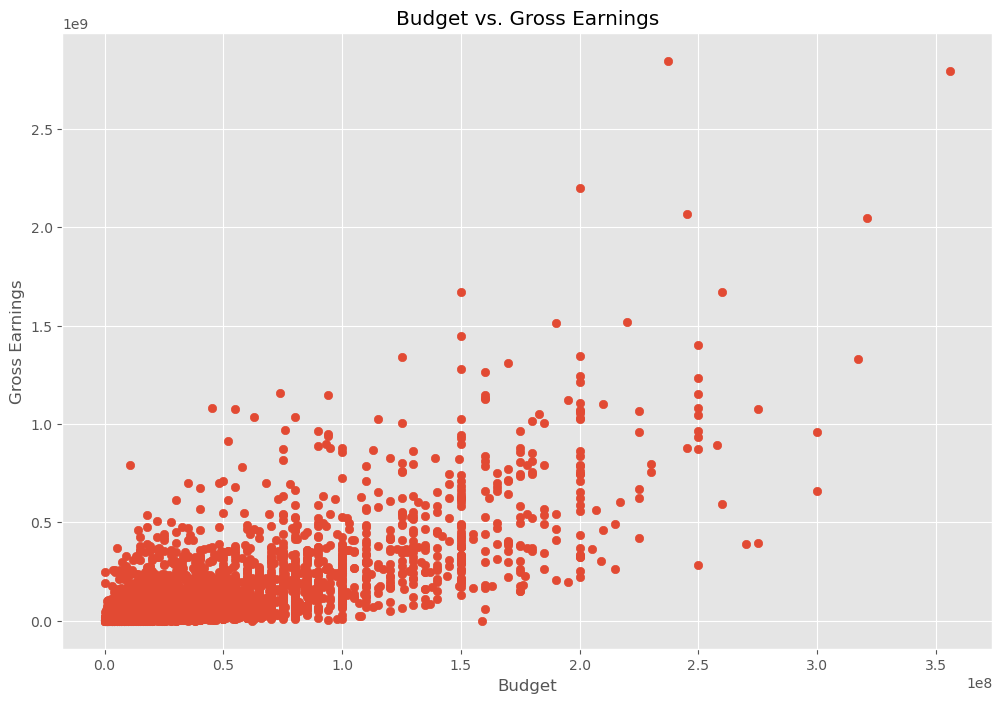

In [8]:
# scatter plot of budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

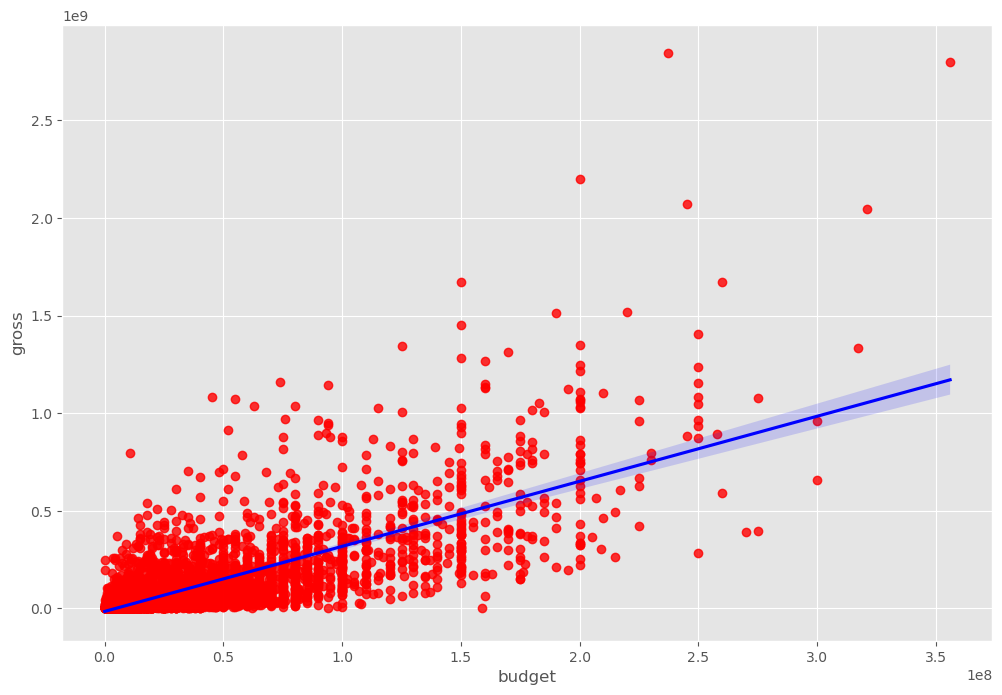

In [9]:
# plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

In [10]:
# diving into correlation 

In [11]:
# using pearson method
df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']].corr(method = 'pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


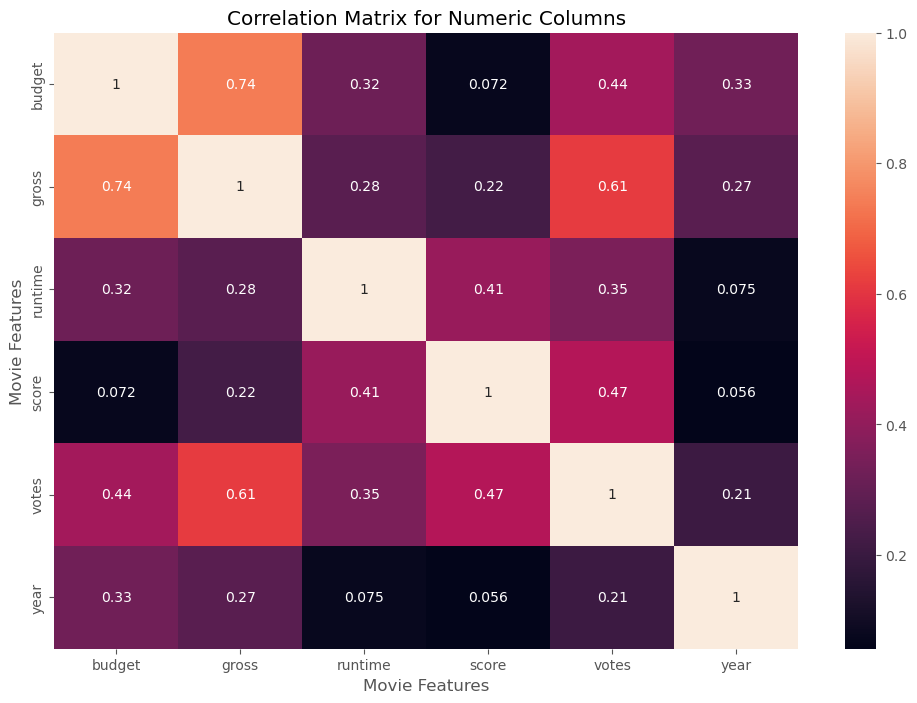

In [12]:
corr_matrix = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']].corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [13]:
# sorted correlation coefficients

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

budget   budget     1.000000
gross    gross      1.000000
votes    votes      1.000000
score    score      1.000000
runtime  runtime    1.000000
year     year       1.000000
gross    budget     0.740247
budget   gross      0.740247
gross    votes      0.614751
votes    gross      0.614751
         score      0.474256
score    votes      0.474256
budget   votes      0.439675
votes    budget     0.439675
score    runtime    0.414068
runtime  score      0.414068
         votes      0.352303
votes    runtime    0.352303
year     budget     0.327722
budget   year       0.327722
         runtime    0.318695
runtime  budget     0.318695
         gross      0.275796
gross    runtime    0.275796
year     gross      0.274321
gross    year       0.274321
         score      0.222556
score    gross      0.222556
year     votes      0.206021
votes    year       0.206021
year     runtime    0.075077
runtime  year       0.075077
budget   score      0.072001
score    budget     0.072001
year     score

In [14]:
# finding the pairs with a high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr


budget   budget     1.000000
gross    gross      1.000000
votes    votes      1.000000
score    score      1.000000
runtime  runtime    1.000000
year     year       1.000000
gross    budget     0.740247
budget   gross      0.740247
gross    votes      0.614751
votes    gross      0.614751
dtype: float64

In [33]:
# Overall we learn that budget and votes have the highest correlation to gross earnings